# Floyd Warshal Implementation on Orange County Cities

### importing libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### Defining cities

In [48]:
cities = [
    "Aliso Viejo", "Anaheim", "Brea", "Buena Park", "Costa Mesa", "Cypress", "Dana Point",
    "Fountain Valley", "Fullerton", "Garden Grove", "Huntington Beach", "Irvine", "La Habra",
    "La Palma", "Laguna Beach", "Laguna Hills", "Laguna Niguel", "Laguna Woods", "Lake Forest",
    "Los Alamitos", "Mission Viejo", "Newport Beach", "Orange", "Placentia", "Rancho Santa Margarita",
    "San Clemente", "San Juan Capistrano", "Santa Ana", "Seal Beach", "Stanton", "Tustin",
    "Villa Park", "Westminster", "Yorba Linda"]

### Initialize graph

In [49]:
n = len(cities)
graph = np.full((n, n), np.inf)  # Use np.inf to represent no direct path
np.fill_diagonal(graph, 0)  # Distance from a city to itself is 0

### Randomly generate edges or distances between cities

In [50]:
edge_density = 0.2  # Roughly 20% of all possible edges will be created
for i in range(n):
    for j in range(i + 1, n):
        if np.random.random() < edge_density:  # Decide whether to create an edge
            distance = np.random.randint(1, 101)    # Assign a random weight (distance) between 1 and 100
            graph[i, j] = graph[j, i] = distance  # Ensure the graph is undirected
graph[:5, :5]

array([[ 0., inf, 16., 75., inf],
       [inf,  0., inf, inf, 55.],
       [16., inf,  0., inf, inf],
       [75., inf, inf,  0., 38.],
       [inf, 55., inf, 38.,  0.]])

### Floyd Warshal Implmeentation on the graph created in above cell

In [51]:
def floyd_warshall(graph):
    
    n = graph.shape[0]
    dist = graph.copy()     # Initialize distance matrix
    
    next_node = np.full((n, n), -1, dtype=int)  # Initialize the next matrix for path reconstruction
    for i in range(n):
        for j in range(n):
            if graph[i, j] < np.inf:
                next_node[i, j] = j

    for k in range(n):      # Compute shortest paths
        for i in range(n):
            for j in range(n):
                if dist[i, k] + dist[k, j] < dist[i, j]:
                    dist[i, j] = dist[i, k] + dist[k, j]
                    next_node[i, j] = next_node[i, k]
    
    return dist, next_node

### Calling Floyd Warshal method on the graph created 

In [52]:
distances, paths = floyd_warshall(graph)

### Convert the distances matrix into a more readable table format

In [53]:

def format_distances_table(distances, cities):
    table_str = "Distances Matrix:\n"
    header = "{:<20}".format("From/To")
    for city in cities:
        header += "{:>10}".format(city[:10])
    table_str += header + "\n"
    
    for i, row in enumerate(distances):
        row_str = "{:<20}".format(cities[i][:20])
        for dist in row:
            if dist == np.inf:
                row_str += "{:>10}".format("∞")
            else:
                row_str += "{:>10.1f}".format(dist)
        table_str += row_str + "\n"
    return table_str

distances_table = format_distances_table(distances, cities)
print("\n".join(distances_table.split("\n")))

Distances Matrix:
From/To             Aliso Viej   Anaheim      BreaBuena ParkCosta Mesa   CypressDana PointFountain V FullertonGarden GroHuntington    Irvine  La Habra  La PalmaLaguna BeaLaguna HilLaguna NigLaguna WooLake ForesLos AlamitMission ViNewport Be    Orange PlacentiaRancho SanSan ClemenSan Juan C Santa AnaSeal Beach   Stanton    TustinVilla ParkWestminsteYorba Lind
Aliso Viejo                0.0      91.0      16.0      41.0      78.0      41.0      89.0     106.0      21.0      89.0      85.0      84.0      35.0      33.0      85.0      31.0      81.0      42.0      34.0      98.0      94.0      92.0      86.0      93.0      51.0      48.0      55.0      49.0       9.0      80.0      46.0      39.0      88.0      87.0
Anaheim                   91.0       0.0      75.0      86.0      55.0      50.0      89.0     142.0      87.0      83.0      53.0      71.0      94.0      89.0      22.0      96.0     104.0      82.0      57.0      57.0       7.0      69.0      82.0      93.0

In [54]:
def reconstruct_path(start, end, next_node, city_names):
    path = []
    if next_node[start, end] == -1:
        return path  # No path exists
    current = start
    while current != end:
        path.append(city_names[current])
        current = next_node[current, end]
    path.append(city_names[end])  # Add the destination city
    return path



In [55]:
# Example: Find the shortest path from "Aliso Viejo" to "Irvine"
start_city = "Aliso Viejo"
end_city = "Irvine"
start_index = cities.index(start_city)
end_index = cities.index(end_city)

shortest_path = reconstruct_path(start_index, end_index, paths, cities)
shortest_path_distance = distances[start_index, end_index]



In [56]:
print("SHORTEST PATH: ",shortest_path,"\nDISTANCE: ", shortest_path_distance)

SHORTEST PATH:  ['Aliso Viejo', 'Seal Beach', 'Fullerton', 'Buena Park', 'Irvine'] 
DISTANCE:  84.0


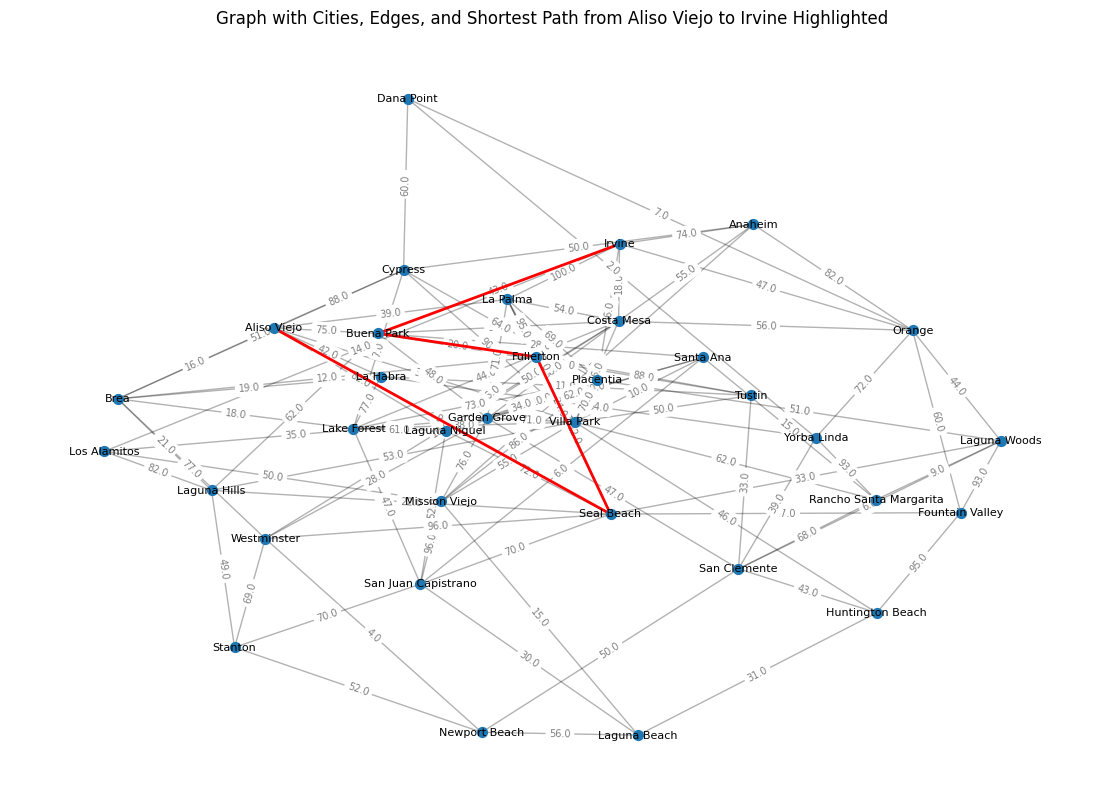

In [58]:
# Create a graph object
G = nx.Graph()

# Add nodes (cities) to the graph
for city in cities:
    G.add_node(city)

# Add edges (paths) between cities to the graph
for i in range(n):
    for j in range(i + 1, n):
        if graph[i, j] < np.inf:
            G.add_edge(cities[i], cities[j], weight=graph[i, j])


pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(14, 10))


edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edges, font_size=7, alpha=0.5)
path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)


nx.draw_networkx_nodes(G, pos, node_size=50)        # nodes
nx.draw_networkx_labels(G, pos, font_size=8)        # node labels

plt.title(f"Graph with Cities, Edges, and Shortest Path from {start_city} to {end_city} Highlighted")
plt.axis('off')
plt.show()

